In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import regex as re

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

In [2]:
movies = pd.read_csv('data/cleaned_movie_stats.csv')

# Data
movies = movies.drop(['genres', 'vid_ids', 'id', 'homepage','revenue', 
                      'release_date', 'decade', 'original_title', 'production_countries',
                     'production_companies', 'original_language',
                     'spoken_languages', 'status', 'title', 'keywords', 'vote_count'], axis=1)
movies.head()

,movie,views,likes,dislikes,comments,budget,overview,popularity,runtime,tagline,vote_average,genre,keyword,language,companies,countries,year,month,homepage_binary,budget_mln
0,Avatar,8611952.0,45703.0,2137.0,7631.0,237000000,"In the 22nd century, a paraplegic Marine is di...",150.437577,162.0,Enter the World of Pandora.,7.2,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['culture clash', 'future', 'space war', 'spac...","['English', 'Español']","['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009.0,12.0,1,237.0
1,Pirates of the Caribbean: At World's End,2678687.0,16962.0,302.0,0.0,300000000,"Captain Barbossa, long believed to be dead, ha...",139.082615,169.0,"At the end of the world, the adventure begins.",6.9,"['Adventure', 'Fantasy', 'Action']","['ocean', 'drug abuse', 'exotic island', 'east...",['English'],"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2007.0,5.0,1,300.0
2,Spectre,5721876.0,14116.0,353.0,673.0,245000000,A cryptic message from Bond’s past sends him o...,107.376788,148.0,A Plan No One Escapes,6.3,"['Action', 'Adventure', 'Crime']","['spy', 'based on novel', 'secret agent', 'seq...","['Français', 'English', 'Español', 'Italiano',...","['Columbia Pictures', 'Danjaq', 'B24']","['United Kingdom', 'United States of America']",2015.0,10.0,1,245.0
3,The Dark Knight Rises,38826999.0,118022.0,3683.0,49919.0,250000000,Following the death of District Attorney Harve...,112.312950,165.0,The Legend Ends,7.6,"['Action', 'Crime', 'Drama', 'Thriller']","['dc comics', 'crime fighter', 'terrorist', 's...",['English'],"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['United States of America'],2012.0,7.0,1,250.0
4,John Carter,5065037.0,11752.0,748.0,652.0,260000000,"John Carter is a war-weary, former military ca...",43.926995,132.0,"Lost in our world, found in another.",6.1,"['Action', 'Adventure', 'Science Fiction']","['based on novel', 'mars', 'medallion', 'space...",['English'],['Walt Disney Pictures'],['United States of America'],2012.0,3.0,1,260.0


In [3]:
movies.columns

Index(['movie', 'views', 'likes', 'dislikes', 'comments', 'budget', 'overview',
       'popularity', 'runtime', 'tagline', 'vote_average', 'genre', 'keyword',
       'language', 'companies', 'countries', 'year', 'month',
       'homepage_binary', 'budget_mln'],
      dtype='object')

## Dropping Null Values

In [4]:
movies.isna().any()

movie              False
views               True
likes               True
dislikes            True
comments            True
budget             False
overview            True
popularity         False
runtime             True
tagline             True
vote_average       False
genre              False
keyword            False
language           False
companies          False
countries          False
year                True
month               True
homepage_binary    False
budget_mln         False
dtype: bool

In [5]:
movies.shape

(4803, 20)

In [6]:
movies = movies.dropna()
movies.shape

(3841, 20)

In [7]:
movies.isna().any()

movie              False
views              False
likes              False
dislikes           False
comments           False
budget             False
overview           False
popularity         False
runtime            False
tagline            False
vote_average       False
genre              False
keyword            False
language           False
companies          False
countries          False
year               False
month              False
homepage_binary    False
budget_mln         False
dtype: bool

### Converting String of List of Strings to Array/List

In [8]:
# Example for Genre Seperations
import regex as re
genres = movies['genre']
genre_seperations = re.findall(r"[^']+", genres[0])
new_genres = [genre_seperations[index] for index in range(1, len(genre_seperations), 2)]
new_genres

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [9]:
import regex as re

genres = movies['genre']
new_genre_list = []

for genre_list in genres:
    genre_seperations = re.findall(r"[^']+", genre_list)
    new_genres = [genre_seperations[index] for index in range(1, len(genre_seperations), 2)]
    new_genre_list.append(new_genres)
    
new_genre_list = np.asarray(new_genre_list)
new_genre_list

/Users/joyceli/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


array([list(['Action', 'Adventure', 'Fantasy', 'Science Fiction']),
       list(['Adventure', 'Fantasy', 'Action']),
       list(['Action', 'Adventure', 'Crime']), ...,
       list(['Action', 'Crime', 'Thriller']), list(['Comedy', 'Romance']),
       list([])], dtype=object)

## Data Preparation

In [10]:
#Defining a Function
# To convert String of List of Strings to Array
def convert_to_list_of_strings(df_column):
    
    new_list = []
    
    for topics in df_column:
        topic_seperations = re.findall(r"[^']+", topics)
        new_topics = [topic_seperations[index] for index in range(1, len(topic_seperations), 2)]
        new_list.append(new_topics)
        
    return np.asarray(new_list)

In [11]:
movies['genre'] = convert_to_list_of_strings(movies['genre'])
movies['keyword'] = convert_to_list_of_strings(movies['keyword'])
movies['companies'] = convert_to_list_of_strings(movies['companies'])
movies['countries'] = convert_to_list_of_strings(movies['countries'])
movies['language'] = convert_to_list_of_strings(movies['language'])

In [12]:
movies.head()

,movie,views,likes,dislikes,comments,budget,overview,popularity,runtime,tagline,vote_average,genre,keyword,language,companies,countries,year,month,homepage_binary,budget_mln
0,Avatar,8611952.0,45703.0,2137.0,7631.0,237000000,"In the 22nd century, a paraplegic Marine is di...",150.437577,162.0,Enter the World of Pandora.,7.2,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[English, Español]","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009.0,12.0,1,237.0
1,Pirates of the Caribbean: At World's End,2678687.0,16962.0,302.0,0.0,300000000,"Captain Barbossa, long believed to be dead, ha...",139.082615,169.0,"At the end of the world, the adventure begins.",6.9,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",[English],"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007.0,5.0,1,300.0
2,Spectre,5721876.0,14116.0,353.0,673.0,245000000,A cryptic message from Bond’s past sends him o...,107.376788,148.0,A Plan No One Escapes,6.3,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Français, English, Español, Italiano, Deutsch]","[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015.0,10.0,1,245.0
3,The Dark Knight Rises,38826999.0,118022.0,3683.0,49919.0,250000000,Following the death of District Attorney Harve...,112.312950,165.0,The Legend Ends,7.6,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",[English],"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012.0,7.0,1,250.0
4,John Carter,5065037.0,11752.0,748.0,652.0,260000000,"John Carter is a war-weary, former military ca...",43.926995,132.0,"Lost in our world, found in another.",6.1,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",[English],[Walt Disney Pictures],[United States of America],2012.0,3.0,1,260.0


In [13]:
genre_dummies = pd.get_dummies(movies['genre'].apply(pd.Series).stack()).sum(level=0)
movies = movies.assign(**genre_dummies).drop(['genre'], axis=1)
movies.head(2)

,movie,views,likes,dislikes,comments,budget,overview,popularity,runtime,tagline,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Avatar,8611952.0,45703.0,2137.0,7631.0,237000000,"In the 22nd century, a paraplegic Marine is di...",150.437577,162.0,Enter the World of Pandora.,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Pirates of the Caribbean: At World's End,2678687.0,16962.0,302.0,0.0,300000000,"Captain Barbossa, long believed to be dead, ha...",139.082615,169.0,"At the end of the world, the adventure begins.",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Adding Top 10 Production Companies (Binarized)

In [14]:
movies['companies']

0       [Ingenious Film Partners, Twentieth Century Fo...
1       [Walt Disney Pictures, Jerry Bruckheimer Films...
2                        [Columbia Pictures, Danjaq, B24]
3       [Legendary Pictures, Warner Bros., DC Entertai...
4                                  [Walt Disney Pictures]
                              ...                        
4795    [Asylum Films, FM Entertainment, Eagle Eye Fil...
4796                                          [Thinkfilm]
4798                                  [Columbia Pictures]
4799                                                   []
4801                                                   []
Name: companies, Length: 3841, dtype: object

In [15]:
# Production Companies
# Creating a Seperate Column that Dictates Whether or Not
# The movie is from a Top 10 Major Production Company
# Top 10 Major Production Companies: https://blog.bizvibe.com/blog/top-movie-production-companies

popular_companies = ['Universal Pictures', 'Warner Bros.', 'Columbia Pictures', 'Walt Disney Pictures',
                    'Paramount Pictures', 'Twentieth Century Fox', 'RatPac-Dune Entertainment',
                    'Legendary Entertainment', 'Relativity Media']

pop_companies_binary = []
for production_companies in movies['companies']:
    
    if len(production_companies) == 0:
        pop_companies_binary.append(0)
        continue
    
    else:
        for company, index in zip(production_companies, range(0, len(production_companies))):
            if company in popular_companies:
                pop_companies_binary.append(1)
                break
            elif index == len(production_companies) - 1:
                pop_companies_binary.append(0)

len(pop_companies_binary), len(movies['companies'].values)

(3841, 3841)

In [16]:
movies['top_production_company'] = pop_companies_binary
movies.head(2)

,movie,views,likes,dislikes,comments,budget,overview,popularity,runtime,tagline,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,top_production_company
0,Avatar,8611952.0,45703.0,2137.0,7631.0,237000000,"In the 22nd century, a paraplegic Marine is di...",150.437577,162.0,Enter the World of Pandora.,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,Pirates of the Caribbean: At World's End,2678687.0,16962.0,302.0,0.0,300000000,"Captain Barbossa, long believed to be dead, ha...",139.082615,169.0,"At the end of the world, the adventure begins.",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [17]:
movies.columns

Index(['movie', 'views', 'likes', 'dislikes', 'comments', 'budget', 'overview',
       'popularity', 'runtime', 'tagline', 'vote_average', 'keyword',
       'language', 'companies', 'countries', 'year', 'month',
       'homepage_binary', 'budget_mln', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'top_production_company'],
      dtype='object')

**Note:** Removing Overview and Tagline Temporarily for Clean Model

In [18]:
movies = movies.drop(['overview', 'tagline', 'companies'], axis=1)
movies.head(2)

,movie,views,likes,dislikes,comments,budget,popularity,runtime,vote_average,keyword,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,top_production_company
0,Avatar,8611952.0,45703.0,2137.0,7631.0,237000000,150.437577,162.0,7.2,"[culture clash, future, space war, space colon...",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,Pirates of the Caribbean: At World's End,2678687.0,16962.0,302.0,0.0,300000000,139.082615,169.0,6.9,"[ocean, drug abuse, exotic island, east india ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### One-Hot Encoding Language and Countries

In [19]:
language_dummies = pd.get_dummies(movies['language'].apply(pd.Series).stack()).sum(level=0).drop([', '], axis=1)
countries_dummies = pd.get_dummies(movies['countries'].apply(pd.Series).stack()).sum(level=0)
movies = movies.assign(**language_dummies)
movies = movies.assign(**countries_dummies)
movies = movies.drop(['language', 'countries'], axis=1)
movies = movies.dropna()
print(movies.shape)
movies.head(2)

(3762, 168)


,movie,views,likes,dislikes,comments,budget,popularity,runtime,vote_average,keyword,...,Sweden,Switzerland,Taiwan,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America
0,Avatar,8611952.0,45703.0,2137.0,7631.0,237000000,150.437577,162.0,7.2,"[culture clash, future, space war, space colon...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,Pirates of the Caribbean: At World's End,2678687.0,16962.0,302.0,0.0,300000000,139.082615,169.0,6.9,"[ocean, drug abuse, exotic island, east india ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
countries_dummies.columns

Index(['Angola', 'Argentina', 'Aruba', 'Australia', 'Austria', 'Bahamas',
       'Belgium', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Bulgaria', 'Cambodia', 'Canada', 'Chile', 'China', 'Colombia',
       'Czech Republic', 'Denmark', 'Dominica', 'Ecuador', 'Egypt', 'Fiji',
       'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Libyan Arab Jamahiriya', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Malta', 'Mexico', 'Monaco', 'Morocco',
       'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Pakistan', 'Panama',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Serbia', 'Serbia and Montenegro', 'Singapore', 'Slovenia',
       'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'Taiwan', 'Thailand', 'Tunisia', 'Turkey', 'Ukraine',
       'United Arab Emirates', 'United Kingdom'

In [21]:
language_dummies.columns

Index(['Afrikaans', 'Bahasa indonesia', 'Bosanski', 'Català', 'Cymraeg',
       'Dansk', 'Deutsch', 'Eesti', 'English', 'Español', 'Esperanto',
       'Français', 'Gaeilge', 'Galego', 'Hrvatski', 'Italiano', 'Kiswahili',
       'Latin', 'Magyar', 'Nederlands', 'No Language', 'Norsk', 'Polski',
       'Português', 'Pусский', 'Română', 'Slovenčina', 'Somali', 'Srpski',
       'Tiếng Việt', 'Türkçe', 'Wolof', ']', 'isiZulu', 'shqip', 'suomi',
       'svenska', 'Íslenska', 'Český', 'ελληνικά', 'Український',
       'български език', 'қазақ', 'עִבְרִית', 'اردو', 'العربية', 'فارسی',
       'हिन्दी', 'বাংলা', 'ਪੰਜਾਬੀ', 'தமிழ்', 'ภาษาไทย', 'ქართული', '广州话 / 廣州話',
       '日本語', '普通话', '한국어/조선말'],
      dtype='object')

In [22]:
movies.columns

Index(['movie', 'views', 'likes', 'dislikes', 'comments', 'budget',
       'popularity', 'runtime', 'vote_average', 'keyword',
       ...
       'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Tunisia', 'Turkey',
       'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States of America'],
      dtype='object', length=168)

### Lastly, Temporarily Removing Keywords

Too many columns to one-hot encode for keywords so simply removing it from model.

In [23]:
keyword_dummies = pd.get_dummies(movies['keyword'].apply(pd.Series).stack()).sum(level=0)
keyword_dummies.columns

Index([' boarding school", ', ' life", ', ' man", ', ' movement", ',
       ' quarter", ', ' school", ', ' war", ', ', ', ', "children',
       ', "leaving one',
       ...
       'zombie', 'zombie apocalypse', 'zombification', 'zoo', 'zookeeper',
       'zurich', 'Γη', '卧底肥妈', '绝地奶霸', '超级妈妈'],
      dtype='object', length=8937)

In [24]:
movies = movies.drop(['keyword'], axis=1)

In [25]:
print(movies.shape)
movies.columns

(3762, 167)


Index(['movie', 'views', 'likes', 'dislikes', 'comments', 'budget',
       'popularity', 'runtime', 'vote_average', 'year',
       ...
       'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Tunisia', 'Turkey',
       'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States of America'],
      dtype='object', length=167)

### Defining Target Column

In [26]:
ratings_labels = movies['vote_average'].values
popularity_labels =  movies['popularity'].values
movie_label = movies['movie'].values


movies = movies.drop(columns=['vote_average', 'popularity', 'movie'])


## Feature Selection

In [27]:
#Variance Inflation Factor
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)] 
    return pd.Series(vif[1:], index=columns)


In [28]:
og_features = list(movies.columns)

In [29]:
columns = og_features
vifs = pd.DataFrame(VIF(movies, columns))
vifs.sort_values(by= [0], ascending = False).head(20)
#Many of the top VIF values are Countries: drop countries column

/Users/joyceli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/joyceli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,0
budget,inf
Ecuador,inf
budget_mln,inf
Colombia,inf
comments,6.906132
likes,6.355523
Dominica,3.231516
Bahasa indonesia,2.784919
views,2.746425
Bosanski,2.735371


In [30]:
#Columns to drop based on VIF and Random Forest Feature Selection

#Dropped all countries because many were showing with high VIF values
#Dropped all languages because many languages had very low on Random Forest Feature Importances
#Dropped budget_mln and Comments because they are highly collinear with other features

delete = list(language_dummies.copy())
delete += list(countries_dummies.copy())
delete += ['budget_mln', 'comments']

In [31]:
#Test VIF after dropping columns --> all under 5
new_features = og_features.copy()
for i in delete:
    new_features.remove(i)

columns = new_features
vifs2 = pd.DataFrame(VIF(movies, columns))
vifs2


vifs2.sort_values(by= [0], ascending = False)

,0
views,2.497480
budget,1.930393
dislikes,1.924296
likes,1.726925
Family,1.718250
runtime,1.674383
Animation,1.601542
Drama,1.583573
Comedy,1.581055
Action,1.565732


In [32]:
## Delete columns from movies
movies = movies.drop(columns= delete)
movies

,views,likes,dislikes,budget,runtime,year,month,homepage_binary,Action,Adventure,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,top_production_company
0,8611952.0,45703.0,2137.0,237000000,162.0,2009.0,12.0,1,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,2678687.0,16962.0,302.0,300000000,169.0,2007.0,5.0,1,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,5721876.0,14116.0,353.0,245000000,148.0,2015.0,10.0,1,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,38826999.0,118022.0,3683.0,250000000,165.0,2012.0,7.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,5065037.0,11752.0,748.0,260000000,132.0,2012.0,3.0,1,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,12161.0,48.0,9.0,13,84.0,2007.0,1.0,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4792,86276.0,1056.0,11.0,20000,111.0,1997.0,11.0,0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4795,10350.0,34.0,5.0,0,98.0,1995.0,9.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4796,2494297.0,7238.0,459.0,7000,77.0,2004.0,10.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0


## Dataframe for Modeling: Split into Train and Test Sets

In [33]:
# Need 25 - 30% of Data for Testing

train_ratio = 0.75
validation_ratio = 0.15
#test_ratio = 0.10

# Training Data
train_data = movies[:round(movies.shape[0] * train_ratio)]
train_rating_labels =  ratings_labels[:round(movies.shape[0] * train_ratio)]
train_popularity_labels = popularity_labels[:round(movies.shape[0] * train_ratio)]
train_movie_labels = movie_label[:round(movies.shape[0] * train_ratio)]

# Validation Data
end_index = round(movies.shape[0] * train_ratio) + round(movies.shape[0] * validation_ratio)
val_data = movies[round(movies.shape[0] * train_ratio):end_index]
val_rating_labels =  ratings_labels[round(movies.shape[0] * train_ratio):end_index]
val_popularity_labels = popularity_labels[round(movies.shape[0] * train_ratio):end_index]
val_movie_labels = movie_label[round(movies.shape[0] * train_ratio):end_index]

# Testing Data
test_data = movies[end_index:]
test_rating_labels =  ratings_labels[end_index:]
test_popularity_labels = popularity_labels[end_index:]
test_movie_labels = movie_label[end_index:]

print('Training Data:', train_data.shape)
print('Training Data Rating Labels:', train_rating_labels.shape)
print('Training Data Popularity Labels:', train_popularity_labels.shape)
print('Training Data Movie Labels:', train_movie_labels.shape)
print()

print('Validation Data:', val_data.shape)
print('Validation Data Rating Labels:', val_rating_labels.shape)
print('Validation Data Popularity Labels:', val_popularity_labels.shape)
print('Validation Data Movie Labels:', val_movie_labels.shape)
print()

print('Testing Data:', test_data.shape)
print('Testing Data Rating Labels:', test_rating_labels.shape)
print('Testing Data Popularity Labels:', test_popularity_labels.shape)
print('Testing Data Movie Labels:', test_movie_labels.shape)

Training Data: (2822, 29)
Training Data Rating Labels: (2822,)
Training Data Popularity Labels: (2822,)
Training Data Movie Labels: (2822,)

Validation Data: (564, 29)
Validation Data Rating Labels: (564,)
Validation Data Popularity Labels: (564,)
Validation Data Movie Labels: (564,)

Testing Data: (376, 29)
Testing Data Rating Labels: (376,)
Testing Data Popularity Labels: (376,)
Testing Data Movie Labels: (376,)


In [34]:
#len(ratings_labels) -len(train_rating_labels) -len(test_rating_labels)

### Final Datasets

In [106]:
train_data

,views,likes,dislikes,budget,runtime,year,month,homepage_binary,Action,Adventure,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,top_production_company
0,8611952.0,45703.0,2137.0,237000000,162.0,2009.0,12.0,1,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,2678687.0,16962.0,302.0,300000000,169.0,2007.0,5.0,1,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,5721876.0,14116.0,353.0,245000000,148.0,2015.0,10.0,1,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,38826999.0,118022.0,3683.0,250000000,165.0,2012.0,7.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,5065037.0,11752.0,748.0,260000000,132.0,2012.0,3.0,1,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,518075.0,2565.0,76.0,6500000,142.0,1969.0,12.0,1,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3252,69599.0,456.0,19.0,14000000,112.0,1994.0,10.0,0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3253,62252.0,584.0,4.0,8000000,91.0,1999.0,10.0,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3254,441734.0,1659.0,83.0,8000000,112.0,2006.0,4.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [41]:
val_data

,views,likes,dislikes,budget,runtime,year,month,homepage_binary,Action,Adventure,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,top_production_company
3256,784488.0,4007.0,135.0,8000000,97.0,2009.0,1.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3258,555880.0,1291.0,63.0,8000000,93.0,2002.0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3259,271007.0,376.0,27.0,8000000,116.0,2006.0,7.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3260,550547.0,959.0,41.0,8000000,118.0,2009.0,11.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3263,10391383.0,33040.0,882.0,8000000,92.0,2010.0,9.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4052,34071.0,526.0,7.0,4000000,95.0,1982.0,8.0,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4053,106416.0,405.0,15.0,2200000,92.0,1985.0,3.0,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4058,284277.0,9365.0,306.0,2300000,97.0,2015.0,10.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4060,426753.0,750.0,66.0,0,90.0,2014.0,11.0,0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [42]:
test_data

,views,likes,dislikes,budget,runtime,year,month,homepage_binary,Action,Adventure,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,top_production_company
4062,88035.0,347.0,14.0,2100000,172.0,1946.0,12.0,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4063,5078119.0,24450.0,945.0,0,113.0,2001.0,6.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4066,740251.0,4566.0,204.0,1500000,78.0,2007.0,4.0,1,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4069,282193.0,3514.0,55.0,0,77.0,2015.0,7.0,1,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4070,12364.0,32.0,3.0,0,81.0,2015.0,2.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,12161.0,48.0,9.0,13,84.0,2007.0,1.0,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4792,86276.0,1056.0,11.0,20000,111.0,1997.0,11.0,0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4795,10350.0,34.0,5.0,0,98.0,1995.0,9.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4796,2494297.0,7238.0,459.0,7000,77.0,2004.0,10.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0


## PCA

Percentage of variance explained by each of the first k components:
k = 1: 0.94
k = 2: 1.0
k = 3: 1.0
k = 4: 1.0
k = 5: 1.0
k = 10: 1.0
k = 20: 1.0
k = 29: 1.0


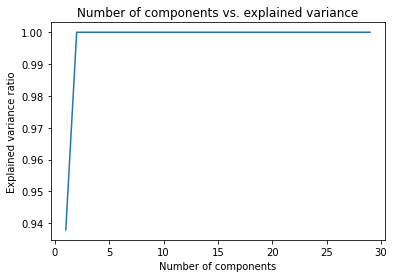

In [35]:
def P1():
    
    k = [1, 2, 3, 4, 5, 10, 20, 29]
    pca = PCA(n_components=k[-1])
    pca.fit(test_data)
    explained_variance = np.cumsum(pca.explained_variance_ratio_)
    
    print("Percentage of variance explained by each of the first k components:")
    for i, k in enumerate(k):
        print(f'k = {k}: {round(explained_variance[k-1], 2)}')
        
    plt.plot(np.arange(1,30), explained_variance)
    plt.ylabel('Explained variance ratio') 
    plt.xlabel('Number of components')
    plt.title('Number of components vs. explained variance')  
    plt.show() 

P1()

In [36]:
pca = PCA(n_components=2)
trainPrincipalComponents = pca.fit_transform(train_data)
valPrincipalComponents = pca.fit_transform(val_data)
testPrincipalComponents = pca.transform(test_data)

trainPrincipalDf = pd.DataFrame(data = trainPrincipalComponents, columns = ['principal component 1', 'principal component 2'])
valPrincipalDf = pd.DataFrame(data = valPrincipalComponents, columns = ['principal component 1', 'principal component 2'])
testPrincipalDf = pd.DataFrame(data = testPrincipalComponents, columns = ['principal component 1', 'principal component 2'])

trainPrincipalDf

,principal component 1,principal component 2
0,1.921909e+08,-3.354922e+06
1,2.548520e+08,-1.217474e+07
2,2.000498e+08,-6.609454e+06
3,2.065646e+08,2.623078e+07
4,2.150038e+08,-7.954354e+06
...,...,...
2817,-3.843763e+07,-8.563969e+05
2818,-3.096613e+07,-1.648780e+06
2819,-3.696014e+07,-1.380615e+06
2820,-3.694272e+07,-1.001538e+06


In [37]:
valPrincipalDf

,principal component 1,principal component 2
0,3.383139e+05,4.131192e+06
1,1.193930e+05,4.197067e+06
2,-1.533988e+05,4.279153e+06
3,1.142849e+05,4.198604e+06
4,9.537781e+06,1.362989e+06
...,...,...
559,-1.532869e+06,5.170790e+05
560,-1.982257e+06,-1.227422e+06
561,-1.783090e+06,-1.182924e+06
562,-2.309430e+06,-3.426416e+06


In [38]:
testPrincipalDf

,principal component 1,principal component 2
0,-2.028673e+06,-1.317884e+06
1,2.144711e+06,-4.766707e+06
2,-1.576996e+06,-2.080373e+06
3,-2.447846e+06,-3.384765e+06
4,-2.706243e+06,-3.307011e+06
...,...,...
371,-2.706433e+06,-3.306940e+06
372,-2.629699e+06,-3.309158e+06
373,-2.708171e+06,-3.306431e+06
374,-3.275524e+05,-4.015471e+06


###  PCA Linear Regression Model

In [82]:
np.array(trainPrincipalDf).reshape(-1,1)

array([[ 1.92190905e+08],
       [-3.35492178e+06],
       [ 2.54852013e+08],
       ...,
       [-1.00153830e+06],
       [-3.69282154e+07],
       [-6.86089612e+05]])

In [86]:
len(trainPrincipalDf), len(train_rating_labels)

(2822, 2822)

In [103]:
linreg = LinearRegression()
linreg.fit(trainPrincipalDf, train_rating_labels)
train_pca_lr_predictions = linreg.predict(trainPrincipalDf)
val_pca_lr_predictions = linreg.predict(valPrincipalDf)
test_pca_lr_predictions = linreg.predict(testPrincipalDf)


In [105]:
#Train Predictions
mse_ratings = mean_squared_error(train_rating_labels, train_pca_lr_predictions)
mae_ratings = mean_absolute_error(train_rating_labels, train_pca_lr_predictions)
print('Train Linear Regression Ratings Mean Squared Error: ', mse_ratings)
print('Train Linear Regression Ratings Mean Absolute Error: ', mae_ratings)

mse_ratings = mean_squared_error(val_rating_labels, val_pca_lr_predictions)
mae_ratings = mean_absolute_error(val_rating_labels, val_pca_lr_predictions)
print('Val Linear Regression Ratings Mean Squared Error: ', mse_ratings)
print('Val Linear Regression Ratings Mean Absolute Error: ', mae_ratings)

mse_ratings = mean_squared_error(test_rating_labels, test_pca_lr_predictions)
mae_ratings = mean_absolute_error(test_rating_labels, test_pca_lr_predictions)
print('Test Linear Regression Ratings Mean Squared Error: ', mse_ratings)
print('Test Linear Regression Ratings Mean Absolute Error: ', mae_ratings)

Train Linear Regression Ratings Mean Squared Error:  0.733472106636091
Train Linear Regression Ratings Mean Absolute Error:  0.6706893825885655
Val Linear Regression Ratings Mean Squared Error:  1.2933460089324111
Val Linear Regression Ratings Mean Absolute Error:  0.8435410254026462
Test Linear Regression Ratings Mean Squared Error:  1.7480557998777269
Test Linear Regression Ratings Mean Absolute Error:  0.9151257347069901


## Regression Models

In [43]:
#Check nulls one last time
train_data.isna().any()

views                     False
likes                     False
dislikes                  False
budget                    False
runtime                   False
year                      False
month                     False
homepage_binary           False
Action                    False
Adventure                 False
Animation                 False
Comedy                    False
Crime                     False
Documentary               False
Drama                     False
Family                    False
Fantasy                   False
Foreign                   False
History                   False
Horror                    False
Music                     False
Mystery                   False
Romance                   False
Science Fiction           False
TV Movie                  False
Thriller                  False
War                       False
Western                   False
top_production_company    False
dtype: bool

### Linear Regression

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Fitting Linear Model for Rating
linear_model = LinearRegression().fit(train_data, train_rating_labels)
dev_predicted_rating_labels = linear_model.predict(val_data)
test_predicted_rating_labels = linear_model.predict(test_data)


# Collecting Other Metrics for Ratings
mse_ratings = mean_squared_error(val_rating_labels, dev_predicted_rating_labels)
mae_ratings = mean_absolute_error(val_rating_labels, dev_predicted_rating_labels)
print('Dev Linear Regression Ratings Mean Squared Error: ', mse_ratings)
print('Dev Linear Regression Ratings Mean Absolute Error: ', mae_ratings)
print()

mse_ratings = mean_squared_error(test_rating_labels, test_predicted_rating_labels)
mae_ratings = mean_absolute_error(test_rating_labels, test_predicted_rating_labels)
print('Test Linear Regression Ratings Mean Squared Error: ', mse_ratings)
print('Test Linear Regression Ratings Mean Absolute Error: ', mae_ratings)
print()


Dev Linear Regression Ratings Mean Squared Error:  1.0049413946409693
Dev Linear Regression Ratings Mean Absolute Error:  0.7161991511086307

Test Linear Regression Ratings Mean Squared Error:  1.4400229408034593
Test Linear Regression Ratings Mean Absolute Error:  0.795337217171135



## Ridge Regression with Cross Validation

In [149]:
from sklearn.linear_model import Ridge
lr = Ridge()
lr.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [150]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

grid = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='r2', verbose=1)
grid_result = grid.fit(train_data, train_rating_labels)
print('Best Params: ', grid_result.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Params:  {'alpha': 1}


/Users/joyceli/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.16762e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/joyceli/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.74743e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/joyceli/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.77228e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/joyceli/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.87656e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/joyceli/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: 

In [151]:
test_predicted_rating_labels = Ridge(alpha=1).fit(train_data, train_rating_labels).predict(test_data)

mse_ratings = mean_squared_error(test_rating_labels, test_predicted_rating_labels)
mae_ratings = mean_absolute_error(test_rating_labels, test_predicted_rating_labels)
print('Test Linear Regression Ratings Mean Squared Error: ', mse_ratings)
print('Test Linear Regression Ratings Mean Absolute Error: ', mae_ratings)
print()


Test Linear Regression Ratings Mean Squared Error:  1.4409735448676841
Test Linear Regression Ratings Mean Absolute Error:  0.7961882840661219



/Users/joyceli/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69622e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


### Random Forest Regression

In [111]:
# Random forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Fitting Random Forest Regressor for Ratings
rand_forest_model = RandomForestRegressor(criterion = 'mae').fit(train_data, train_rating_labels)
dev_predicted_labels = rand_forest_model.predict(val_data)
test_predicted_labels = rand_forest_model.predict(test_data)

#accuracy = rand_forest_model.score(val_data, val_rating_labels)
#print('Random Forest Regressor Popularity Accuracy: ', accuracy)

# Collecting Other Metrics for Ratings
mse_ratings = mean_squared_error(val_rating_labels, dev_predicted_labels)
mae_ratings = mean_absolute_error(val_rating_labels, dev_predicted_labels)
print('Dev Random Forest Regressor Ratings Mean Squared Error: ', mse_ratings)
print('Dev Random Forest Regressor Ratings Mean Absolute Error: ', mae_ratings)
print()


mse_ratings = mean_squared_error(test_rating_labels, test_predicted_labels)
mae_ratings = mean_absolute_error(test_rating_labels, test_predicted_labels)
print('Test Random Forest Regressor Ratings Mean Squared Error: ', mse_ratings)
print('Test Random Forest Regressor Ratings Mean Absolute Error: ', mae_ratings)
print()

Dev Random Forest Regressor Ratings Mean Squared Error:  0.9604043785461
Dev Random Forest Regressor Ratings Mean Absolute Error:  0.7174716312056739

Test Random Forest Regressor Ratings Mean Squared Error:  1.443239160904256
Test Random Forest Regressor Ratings Mean Absolute Error:  0.8374202127659578



## Random Forest with Cross Validation

In [58]:
from pprint import pprint

rf = RandomForestRegressor(criterion='mae')
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mae',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [67]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(criterion='mae')

parameter_grid = {'n_estimators': list(np.arange(10,200,10)),
               'max_features': list(np.arange(1, 30, 5)),
               'max_depth': list(np.arange(1,20,5))}

clf = GridSearchCV(estimator = rf, param_grid = parameter_grid, cv = 3, verbose=2)

clf.fit(train_data, train_rating_labels)

Fitting 3 folds for each of 456 candidates, totalling 1368 fits
[CV] END .......max_depth=1, max_features=1, n_estimators=10; total time=   0.1s
[CV] END .......max_depth=1, max_features=1, n_estimators=10; total time=   0.1s
[CV] END .......max_depth=1, max_features=1, n_estimators=10; total time=   0.1s
[CV] END .......max_depth=1, max_features=1, n_estimators=20; total time=   0.1s
[CV] END .......max_depth=1, max_features=1, n_estimators=20; total time=   0.1s
[CV] END .......max_depth=1, max_features=1, n_estimators=20; total time=   0.1s
[CV] END .......max_depth=1, max_features=1, n_estimators=30; total time=   0.2s
[CV] END .......max_depth=1, max_features=1, n_estimators=30; total time=   0.2s
[CV] END .......max_depth=1, max_features=1, n_estimators=30; total time=   0.2s
[CV] END .......max_depth=1, max_features=1, n_estimators=40; total time=   0.2s
[CV] END .......max_depth=1, max_features=1, n_estimators=40; total time=   0.2s
[CV] END .......max_depth=1, max_features=1, 

[CV] END ......max_depth=1, max_features=6, n_estimators=150; total time=   2.2s
[CV] END ......max_depth=1, max_features=6, n_estimators=160; total time=   2.3s
[CV] END ......max_depth=1, max_features=6, n_estimators=160; total time=   3.0s
[CV] END ......max_depth=1, max_features=6, n_estimators=160; total time=   2.8s
[CV] END ......max_depth=1, max_features=6, n_estimators=170; total time=   2.7s
[CV] END ......max_depth=1, max_features=6, n_estimators=170; total time=   2.8s
[CV] END ......max_depth=1, max_features=6, n_estimators=170; total time=   2.6s
[CV] END ......max_depth=1, max_features=6, n_estimators=180; total time=   2.7s
[CV] END ......max_depth=1, max_features=6, n_estimators=180; total time=   2.8s
[CV] END ......max_depth=1, max_features=6, n_estimators=180; total time=   2.6s
[CV] END ......max_depth=1, max_features=6, n_estimators=190; total time=   2.7s
[CV] END ......max_depth=1, max_features=6, n_estimators=190; total time=   2.6s
[CV] END ......max_depth=1, 

[CV] END .....max_depth=1, max_features=16, n_estimators=110; total time=   2.9s
[CV] END .....max_depth=1, max_features=16, n_estimators=120; total time=   3.1s
[CV] END .....max_depth=1, max_features=16, n_estimators=120; total time=   3.3s
[CV] END .....max_depth=1, max_features=16, n_estimators=120; total time=   3.2s
[CV] END .....max_depth=1, max_features=16, n_estimators=130; total time=   3.5s
[CV] END .....max_depth=1, max_features=16, n_estimators=130; total time=   3.5s
[CV] END .....max_depth=1, max_features=16, n_estimators=130; total time=   3.4s
[CV] END .....max_depth=1, max_features=16, n_estimators=140; total time=   3.7s
[CV] END .....max_depth=1, max_features=16, n_estimators=140; total time=   3.8s
[CV] END .....max_depth=1, max_features=16, n_estimators=140; total time=   4.1s
[CV] END .....max_depth=1, max_features=16, n_estimators=150; total time=   4.6s
[CV] END .....max_depth=1, max_features=16, n_estimators=150; total time=   4.6s
[CV] END .....max_depth=1, m

[CV] END ......max_depth=1, max_features=26, n_estimators=70; total time=   3.0s
[CV] END ......max_depth=1, max_features=26, n_estimators=80; total time=   3.4s
[CV] END ......max_depth=1, max_features=26, n_estimators=80; total time=   3.5s
[CV] END ......max_depth=1, max_features=26, n_estimators=80; total time=   3.4s
[CV] END ......max_depth=1, max_features=26, n_estimators=90; total time=   3.7s
[CV] END ......max_depth=1, max_features=26, n_estimators=90; total time=   3.9s
[CV] END ......max_depth=1, max_features=26, n_estimators=90; total time=   4.1s
[CV] END .....max_depth=1, max_features=26, n_estimators=100; total time=   5.1s
[CV] END .....max_depth=1, max_features=26, n_estimators=100; total time=   5.1s
[CV] END .....max_depth=1, max_features=26, n_estimators=100; total time=   5.0s
[CV] END .....max_depth=1, max_features=26, n_estimators=110; total time=   5.7s
[CV] END .....max_depth=1, max_features=26, n_estimators=110; total time=   5.6s
[CV] END .....max_depth=1, m

[CV] END .......max_depth=6, max_features=6, n_estimators=30; total time=   1.0s
[CV] END .......max_depth=6, max_features=6, n_estimators=40; total time=   1.3s
[CV] END .......max_depth=6, max_features=6, n_estimators=40; total time=   1.4s
[CV] END .......max_depth=6, max_features=6, n_estimators=40; total time=   1.4s
[CV] END .......max_depth=6, max_features=6, n_estimators=50; total time=   1.9s
[CV] END .......max_depth=6, max_features=6, n_estimators=50; total time=   1.8s
[CV] END .......max_depth=6, max_features=6, n_estimators=50; total time=   1.8s
[CV] END .......max_depth=6, max_features=6, n_estimators=60; total time=   2.1s
[CV] END .......max_depth=6, max_features=6, n_estimators=60; total time=   2.2s
[CV] END .......max_depth=6, max_features=6, n_estimators=60; total time=   2.1s
[CV] END .......max_depth=6, max_features=6, n_estimators=70; total time=   2.5s
[CV] END .......max_depth=6, max_features=6, n_estimators=70; total time=   2.4s
[CV] END .......max_depth=6,

[CV] END .....max_depth=6, max_features=11, n_estimators=180; total time=   9.5s
[CV] END .....max_depth=6, max_features=11, n_estimators=190; total time=   9.9s
[CV] END .....max_depth=6, max_features=11, n_estimators=190; total time=  10.2s
[CV] END .....max_depth=6, max_features=11, n_estimators=190; total time=   9.9s
[CV] END ......max_depth=6, max_features=16, n_estimators=10; total time=   0.7s
[CV] END ......max_depth=6, max_features=16, n_estimators=10; total time=   0.7s
[CV] END ......max_depth=6, max_features=16, n_estimators=10; total time=   0.7s
[CV] END ......max_depth=6, max_features=16, n_estimators=20; total time=   1.4s
[CV] END ......max_depth=6, max_features=16, n_estimators=20; total time=   1.5s
[CV] END ......max_depth=6, max_features=16, n_estimators=20; total time=   1.5s
[CV] END ......max_depth=6, max_features=16, n_estimators=30; total time=   2.2s
[CV] END ......max_depth=6, max_features=16, n_estimators=30; total time=   2.2s
[CV] END ......max_depth=6, 

[CV] END .....max_depth=6, max_features=21, n_estimators=140; total time=  15.6s
[CV] END .....max_depth=6, max_features=21, n_estimators=150; total time=  14.3s
[CV] END .....max_depth=6, max_features=21, n_estimators=150; total time=  15.6s
[CV] END .....max_depth=6, max_features=21, n_estimators=150; total time=  16.4s
[CV] END .....max_depth=6, max_features=21, n_estimators=160; total time=  17.8s
[CV] END .....max_depth=6, max_features=21, n_estimators=160; total time=  16.5s
[CV] END .....max_depth=6, max_features=21, n_estimators=160; total time=  17.0s
[CV] END .....max_depth=6, max_features=21, n_estimators=170; total time=  19.0s
[CV] END .....max_depth=6, max_features=21, n_estimators=170; total time=  17.9s
[CV] END .....max_depth=6, max_features=21, n_estimators=170; total time=  18.0s
[CV] END .....max_depth=6, max_features=21, n_estimators=180; total time=  22.1s
[CV] END .....max_depth=6, max_features=21, n_estimators=180; total time=  19.3s
[CV] END .....max_depth=6, m

[CV] END .....max_depth=11, max_features=1, n_estimators=100; total time=   1.5s
[CV] END .....max_depth=11, max_features=1, n_estimators=110; total time=   1.7s
[CV] END .....max_depth=11, max_features=1, n_estimators=110; total time=   1.8s
[CV] END .....max_depth=11, max_features=1, n_estimators=110; total time=   1.7s
[CV] END .....max_depth=11, max_features=1, n_estimators=120; total time=   2.1s
[CV] END .....max_depth=11, max_features=1, n_estimators=120; total time=   2.1s
[CV] END .....max_depth=11, max_features=1, n_estimators=120; total time=   2.1s
[CV] END .....max_depth=11, max_features=1, n_estimators=130; total time=   2.3s
[CV] END .....max_depth=11, max_features=1, n_estimators=130; total time=   2.3s
[CV] END .....max_depth=11, max_features=1, n_estimators=130; total time=   2.3s
[CV] END .....max_depth=11, max_features=1, n_estimators=140; total time=   2.5s
[CV] END .....max_depth=11, max_features=1, n_estimators=140; total time=   2.5s
[CV] END .....max_depth=11, 

[CV] END .....max_depth=11, max_features=11, n_estimators=60; total time=   4.6s
[CV] END .....max_depth=11, max_features=11, n_estimators=70; total time=   5.9s
[CV] END .....max_depth=11, max_features=11, n_estimators=70; total time=   5.9s
[CV] END .....max_depth=11, max_features=11, n_estimators=70; total time=   5.2s
[CV] END .....max_depth=11, max_features=11, n_estimators=80; total time=   5.4s
[CV] END .....max_depth=11, max_features=11, n_estimators=80; total time=   5.4s
[CV] END .....max_depth=11, max_features=11, n_estimators=80; total time=   6.2s
[CV] END .....max_depth=11, max_features=11, n_estimators=90; total time=   7.6s
[CV] END .....max_depth=11, max_features=11, n_estimators=90; total time=   7.3s
[CV] END .....max_depth=11, max_features=11, n_estimators=90; total time=   6.8s
[CV] END ....max_depth=11, max_features=11, n_estimators=100; total time=   7.4s
[CV] END ....max_depth=11, max_features=11, n_estimators=100; total time=   7.3s
[CV] END ....max_depth=11, m

[CV] END .....max_depth=11, max_features=21, n_estimators=20; total time=   2.7s
[CV] END .....max_depth=11, max_features=21, n_estimators=30; total time=   3.9s
[CV] END .....max_depth=11, max_features=21, n_estimators=30; total time=   4.3s
[CV] END .....max_depth=11, max_features=21, n_estimators=30; total time=   4.0s
[CV] END .....max_depth=11, max_features=21, n_estimators=40; total time=   5.4s
[CV] END .....max_depth=11, max_features=21, n_estimators=40; total time=   5.2s
[CV] END .....max_depth=11, max_features=21, n_estimators=40; total time=   5.3s
[CV] END .....max_depth=11, max_features=21, n_estimators=50; total time=   5.8s
[CV] END .....max_depth=11, max_features=21, n_estimators=50; total time=   6.1s
[CV] END .....max_depth=11, max_features=21, n_estimators=50; total time=   6.1s
[CV] END .....max_depth=11, max_features=21, n_estimators=60; total time=   7.2s
[CV] END .....max_depth=11, max_features=21, n_estimators=60; total time=   7.0s
[CV] END .....max_depth=11, 

[CV] END ....max_depth=11, max_features=26, n_estimators=170; total time=  21.1s
[CV] END ....max_depth=11, max_features=26, n_estimators=180; total time=  22.1s
[CV] END ....max_depth=11, max_features=26, n_estimators=180; total time=  22.0s
[CV] END ....max_depth=11, max_features=26, n_estimators=180; total time=  22.5s
[CV] END ....max_depth=11, max_features=26, n_estimators=190; total time=  23.6s
[CV] END ....max_depth=11, max_features=26, n_estimators=190; total time=  24.2s
[CV] END ....max_depth=11, max_features=26, n_estimators=190; total time=  24.7s
[CV] END ......max_depth=16, max_features=1, n_estimators=10; total time=   0.2s
[CV] END ......max_depth=16, max_features=1, n_estimators=10; total time=   0.2s
[CV] END ......max_depth=16, max_features=1, n_estimators=10; total time=   0.2s
[CV] END ......max_depth=16, max_features=1, n_estimators=20; total time=   0.3s
[CV] END ......max_depth=16, max_features=1, n_estimators=20; total time=   0.3s
[CV] END ......max_depth=16,

[CV] END .....max_depth=16, max_features=6, n_estimators=130; total time=   4.8s
[CV] END .....max_depth=16, max_features=6, n_estimators=140; total time=   5.2s
[CV] END .....max_depth=16, max_features=6, n_estimators=140; total time=   5.4s
[CV] END .....max_depth=16, max_features=6, n_estimators=140; total time=   5.2s
[CV] END .....max_depth=16, max_features=6, n_estimators=150; total time=   5.7s
[CV] END .....max_depth=16, max_features=6, n_estimators=150; total time=   5.8s
[CV] END .....max_depth=16, max_features=6, n_estimators=150; total time=   5.6s
[CV] END .....max_depth=16, max_features=6, n_estimators=160; total time=   6.1s
[CV] END .....max_depth=16, max_features=6, n_estimators=160; total time=   6.0s
[CV] END .....max_depth=16, max_features=6, n_estimators=160; total time=   5.9s
[CV] END .....max_depth=16, max_features=6, n_estimators=170; total time=   6.5s
[CV] END .....max_depth=16, max_features=6, n_estimators=170; total time=   6.5s
[CV] END .....max_depth=16, 

[CV] END .....max_depth=16, max_features=16, n_estimators=90; total time=   7.5s
[CV] END ....max_depth=16, max_features=16, n_estimators=100; total time=   8.3s
[CV] END ....max_depth=16, max_features=16, n_estimators=100; total time=   8.3s
[CV] END ....max_depth=16, max_features=16, n_estimators=100; total time=   8.4s
[CV] END ....max_depth=16, max_features=16, n_estimators=110; total time=   9.1s
[CV] END ....max_depth=16, max_features=16, n_estimators=110; total time=   9.1s
[CV] END ....max_depth=16, max_features=16, n_estimators=110; total time=   9.2s
[CV] END ....max_depth=16, max_features=16, n_estimators=120; total time=  10.2s
[CV] END ....max_depth=16, max_features=16, n_estimators=120; total time=  10.1s
[CV] END ....max_depth=16, max_features=16, n_estimators=120; total time=  10.4s
[CV] END ....max_depth=16, max_features=16, n_estimators=130; total time=  10.8s
[CV] END ....max_depth=16, max_features=16, n_estimators=130; total time=  10.8s
[CV] END ....max_depth=16, m

[CV] END .....max_depth=16, max_features=26, n_estimators=50; total time=   6.5s
[CV] END .....max_depth=16, max_features=26, n_estimators=60; total time=   7.8s
[CV] END .....max_depth=16, max_features=26, n_estimators=60; total time=   7.7s
[CV] END .....max_depth=16, max_features=26, n_estimators=60; total time=   8.6s
[CV] END .....max_depth=16, max_features=26, n_estimators=70; total time=   9.3s
[CV] END .....max_depth=16, max_features=26, n_estimators=70; total time=  35.5s
[CV] END .....max_depth=16, max_features=26, n_estimators=70; total time= 5.8min
[CV] END .....max_depth=16, max_features=26, n_estimators=80; total time=  11.3s
[CV] END .....max_depth=16, max_features=26, n_estimators=80; total time=  11.2s
[CV] END .....max_depth=16, max_features=26, n_estimators=80; total time=  11.3s
[CV] END .....max_depth=16, max_features=26, n_estimators=90; total time=  12.5s
[CV] END .....max_depth=16, max_features=26, n_estimators=90; total time=  12.2s
[CV] END .....max_depth=16, 

GridSearchCV(cv=3, estimator=RandomForestRegressor(criterion='mae'),
             param_grid={'max_depth': [1, 6, 11, 16],
                         'max_features': [1, 6, 11, 16, 21, 26],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190]},
             verbose=2)

In [69]:
clf.best_params_

{'max_depth': 16, 'max_features': 16, 'n_estimators': 70}

In [72]:
best_grid = clf.best_estimator_
best_grid

RandomForestRegressor(criterion='mae', max_depth=16, max_features=16,
                      n_estimators=70)

In [75]:
rf_cv = RandomForestRegressor(criterion='mae', max_depth=16, max_features=16, n_estimators=70).fit(train_data, train_rating_labels)
dev_predicted_labels = rf_cv.predict(val_data)
test_predicted_labels = rf_cv.predict(test_data)

# Collecting Other Metrics for Ratings
dmse_ratings = mean_squared_error(val_rating_labels, dev_predicted_labels)
dmae_ratings = mean_absolute_error(val_rating_labels, dev_predicted_labels)

tmse_ratings = mean_squared_error(test_rating_labels, test_predicted_labels)
tmae_ratings = mean_absolute_error(test_rating_labels, test_predicted_labels)


print('Random Forest Regressor Ratings Dev Mean Squared Error: ', dmse_ratings)
print('Random Forest Regressor Ratings Dev Mean Absolute Error: ', dmae_ratings)

print('Random Forest Regressor Ratings Test Mean Squared Error: ', tmse_ratings)
print('Random Forest Regressor Ratings Test Mean Absolute Error: ', tmae_ratings)
print()

Random Forest Regressor Ratings Dev Mean Squared Error:  0.9450248046026924
Random Forest Regressor Ratings Dev Mean Absolute Error:  0.7078951367781156
Random Forest Regressor Ratings Test Mean Squared Error:  1.4247520611702131
Random Forest Regressor Ratings Test Mean Absolute Error:  0.8291432370820672



### Random Forest Feature Importance Investigation

In [152]:
feature_dict = {} 
for feature, importance in zip(train_data.columns, rand_forest_model.feature_importances_):
    feature_dict[feature] = importance 

importances = pd.DataFrame.from_dict(feature_dict, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False)

,Gini-importance
runtime,0.206373
likes,0.135090
dislikes,0.106096
budget,0.100344
year,0.096386
views,0.089947
month,0.065631
Drama,0.020160
Animation,0.015421
Action,0.013174


### Stochastic Gradient Descent Regression

In [112]:
# Stochastic Gradient Descent Regression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Fitting Stochastic Gradient Descent Regression for Ratings
sgd_model = SGDRegressor().fit(train_data, train_rating_labels)
dev_predicted_labels = sgd_model.predict(val_data)
test_predicted_labels = sgd_model.predict(test_data)
#accuracy = sgd_model.score(val_data, val_rating_labels)
#print('Stochastic Gradient Descent Regression Accuracy: ', accuracy)

# Collecting Other Metrics for Ratings
mse_ratings = mean_squared_error(val_rating_labels, dev_predicted_labels)
mae_ratings = mean_absolute_error(val_rating_labels, dev_predicted_labels)
print('Dev Stochastic Gradient Descent Regression  Mean Squared Error: ', mse_ratings)
print('Dev Stochastic Gradient Descent Regression  Mean Absolute Error: ', mae_ratings)
print()

mse_ratings = mean_squared_error(test_rating_labels, test_predicted_labels)
mae_ratings = mean_absolute_error(test_rating_labels, test_predicted_labels)
print('Test Stochastic Gradient Descent Regression  Mean Squared Error: ', mse_ratings)
print('Test Stochastic Gradient Descent Regression  Mean Absolute Error: ', mae_ratings)
print()


Dev Stochastic Gradient Descent Regression  Mean Squared Error:  1.264950736550762e+47
Dev Stochastic Gradient Descent Regression  Mean Absolute Error:  2.7108188077959196e+23

Test Stochastic Gradient Descent Regression  Mean Squared Error:  6.862375134783166e+46
Test Stochastic Gradient Descent Regression  Mean Absolute Error:  9.298303468309928e+22



# Classification

In [113]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


Creating non-decimal train labels for Classification

In [114]:
train_y = np.round(train_rating_labels)
dev_y = np.round(val_rating_labels)
test_y = np.round(test_rating_labels)

### Decision Tree Classifier

In [51]:
tree = DecisionTreeClassifier(random_state=0, max_depth = 10)
tree.fit(train_data, train_y)

print("Accuracy on train set: ", accuracy_score(train_y, tree.predict(train_data)))
print("Accuracy on dev set: ", accuracy_score(dev_y, tree.predict(val_data)))

print("MSE on train set: ", mean_squared_error(train_y, tree.predict(train_data)))
print("MSE on dev set: ", mean_squared_error(dev_y, tree.predict(val_data)))

print("MAE on train set: ", mean_absolute_error(train_y, tree.predict(train_data)))
print("MAE on dev set: ", mean_absolute_error(dev_y, tree.predict(val_data)))

Accuracy on train set:  0.760099220411056
Accuracy on dev set:  0.39361702127659576
MSE on train set:  0.38128986534372783
MSE on dev set:  1.5407801418439717
MAE on train set:  0.2820694542877392
MAE on dev set:  0.8386524822695035


### Random Forest Classifier

In [52]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
rf = RandomForestClassifier(max_depth=10, random_state=0)
rf.fit(train_data, train_y)

print("Accuracy on train set: ", accuracy_score(train_y, rf.predict(train_data)))
print("Accuracy on dev set: ", accuracy_score(dev_y, rf.predict(val_data)))

print("MSE on train set: ", mean_squared_error(train_y, rf.predict(train_data)))
print("MSE on dev set: ", mean_squared_error(dev_y, rf.predict(val_data)))

print("MAE on train set: ", mean_absolute_error(train_y, rf.predict(train_data)))
print("MAE on dev set: ", mean_absolute_error(dev_y, rf.predict(val_data)))

Accuracy on train set:  0.7902197023387668
Accuracy on dev set:  0.42021276595744683
MSE on train set:  0.36569808646350105
MSE on dev set:  1.2234042553191489
MAE on train set:  0.25726435152374205
MAE on dev set:  0.7340425531914894


### K-Nearest Neighbors Classifier

In [53]:
knc = KNeighborsClassifier(n_neighbors = 15)
knc.fit(train_data, train_y)

print("Accuracy on train set: ", accuracy_score(train_y, knc.predict(train_data)))
print("Accuracy on dev set: ", accuracy_score(dev_y, knc.predict(val_data)))

print("MSE on train set: ", mean_squared_error(train_y, knc.predict(train_data)))
print("MSE on dev set: ", mean_squared_error(dev_y, knc.predict(val_data)))

print("MAE on train set: ", mean_absolute_error(train_y, knc.predict(train_data)))
print("MAE on dev set: ", mean_absolute_error(dev_y, knc.predict(val_data)))

Accuracy on train set:  0.5085046066619419
Accuracy on dev set:  0.36879432624113473
MSE on train set:  0.8561304039688165
MSE on dev set:  1.5868794326241136
MAE on train set:  0.6059532246633593
MAE on dev set:  0.874113475177305


In [54]:
mlp = MLPClassifier(random_state=0, max_iter=500)
mlp.fit(train_data, train_y)

print("Accuracy on train set: ", accuracy_score(train_y, mlp.predict(train_data)))
print("Accuracy on dev set: ", accuracy_score(dev_y, mlp.predict(val_data)))

print("MSE on train set: ", mean_squared_error(train_y, mlp.predict(train_data)))
print("MSE on dev set: ", mean_squared_error(dev_y, mlp.predict(val_data)))

print("MAE on train set: ", mean_absolute_error(train_y, mlp.predict(train_data)))
print("MAE on dev set: ", mean_absolute_error(dev_y, mlp.predict(val_data)))

Accuracy on train set:  0.37739192062367116
Accuracy on dev set:  0.2198581560283688
MSE on train set:  1.2941176470588236
MSE on dev set:  2.228723404255319
MAE on train set:  0.8277817150956768
MAE on dev set:  1.196808510638298


### Ensemble
Sklearn VotingRegressor Ensemble takes the average of differently-trained individual regression models and then outputs a prediction which is the average prediction from those individual models. Ideally, if we put high-performing models into the ensemble, it will return a new ensemble model with the best metrics.

In [146]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import VotingRegressor
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor

# create the sub models
estimators = []

model1 = LinearRegression()
estimators.append(('lr', model1))

model3 = RandomForestRegressor(criterion='mae', max_depth=16, max_features=16, n_estimators=70)
estimators.append(('rf cv', model3))

#model4 = RandomForestRegressor(criterion='mae', max_depth=16, max_features=11, n_estimators=180)
#estimators.append(('rf cv2', model4))

model5 = Ridge(alpha=1)
estimators.append(('ridge', model5))

#model7 = AdaBoostRegressor(n_estimators=100, learning_rate = 0.33, random_state=88)
#estimators.append(('adaboost', model7))


# create the ensemble model
ensemble = VotingRegressor(estimators)

ensemble.fit(train_data, train_rating_labels) 

y_pred_train = ensemble.predict(train_data)

y_pred_test = ensemble.predict(test_data)

#MAE, MSE

#Training Metrics
print ('mse_train:', mean_squared_error(train_rating_labels, y_pred_train))
print ('mae_train:', mean_absolute_error(train_rating_labels, y_pred_train))

#Test Set Metrics
print ('mse_test:', mean_squared_error(test_rating_labels, y_pred_test))
print ('mae_test:', mean_absolute_error(test_rating_labels, y_pred_test))

  

mse_train: 0.3220801404279619
mae_train: 0.4402423865511928
mse_test: 1.386780562161274
mae_test: 0.7898086432208791


/Users/joyceli/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69622e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


### Predicting Spiderman: No Way Home Ratings!

In [144]:
# Spiderman: No Way Home
# Movie length: 148 minutes
# Trailer: https://www.youtube.com/watch?v=ZYzbalQ6Lg8
# Views: 28,837,498
# Likes: 1.4M (1,400,000)
# Dislikes: 12,000
# Genres: Action, Adventure, Sci-Fi
# Companies: Columbia Pictures (presents), Pascal Pictures, Marvel Studios, Sony Pictures Entertainment (SPE)
# Budget: 180000000

spiderman = np.asarray([28837498.0, 112000.0, 12000.0, 180000000.0, # views, likes, dislikes, budget
                       148.0, 2020.0, 12.0, 1.0, # runtime, year, month, homepage_binary
                       1.0, 1.0, 0.0, 0.0, 0.0, 0.0, # action, adventure, animation, comedy, crime, documentary
                       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, # drama, family, fantasy, foreign, history, horror
                       0.0, 0.0, 0.0, 1.0, 0.0, # music, mystery, romance, science fiction, TV Movie
                       0.0, 0.0, 0.0, 1.0]) # Thriller, War, Western, top_production_company

In [148]:
# Fitting Random Forest Regressor for Ratings
ensemble.predict(spiderman.reshape(1, -1))

array([6.80521965])